In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

!pip install minisom
from minisom import MiniSom

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

In [5]:
def som_pie_grid(som, data, labels):
  """Helper to create piechart grid viz
  
  Example: https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/resulting_images/som_iris_pies.png

  :param som: fitted MiniSom instance
  :param data: the data the MiniSom was fit to
  :param labels: an array of labels to use for coloring visual
  """
  labels_map = som.labels_map(data, labels)
  label_names = np.unique(labels)

  plt.figure(figsize=(70, 70))
  the_grid = GridSpec(70, 70)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][lab] for lab in label_names]
      plt.subplot(the_grid[position[1] - 12, position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)

  plt.show()

  # Cheating way to align legend, create a separate figure just 
  # for legend.  Will have superfluous whitespace below
  plt.legend(patches, label_names, loc='upper left', ncol=5)
  plt.axis('off')
  plt.show()

* Read in the data from `data_url`
* Drop all NAs
* Filter based on the `'Pos'` column to where only have the positions `['C', 'PG', 'SG']` remain
* Drop all non-numeric columns
* Scale the data

In [7]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"

In [8]:
df = pd.read_csv(data_url)
df.shape

(2141, 30)

In [9]:
df.isnull().sum()

Seas        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%        10
3P          0
3PA         0
3P%       174
2P          0
2PA         0
2P%        31
eFG%       10
FT          0
FTA         0
FT%       104
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 0 to 2139
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Seas    1895 non-null   int64  
 1   Player  1895 non-null   object 
 2   Pos     1895 non-null   object 
 3   Age     1895 non-null   int64  
 4   Tm      1895 non-null   object 
 5   G       1895 non-null   int64  
 6   GS      1895 non-null   int64  
 7   MP      1895 non-null   float64
 8   FG      1895 non-null   float64
 9   FGA     1895 non-null   float64
 10  FG%     1895 non-null   float64
 11  3P      1895 non-null   float64
 12  3PA     1895 non-null   float64
 13  3P%     1895 non-null   float64
 14  2P      1895 non-null   float64
 15  2PA     1895 non-null   float64
 16  2P%     1895 non-null   float64
 17  eFG%    1895 non-null   float64
 18  FT      1895 non-null   float64
 19  FTA     1895 non-null   float64
 20  FT%     1895 non-null   float64
 21  ORB     1895 non-null   float64
 22  

In [12]:
df_filtered = df.loc[lambda x: x["Pos"].isin(["C", "PG", "SG"])]
df_filtered

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
6,2019,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,1.4,0.300,0.0,0.6,0.000,0.4,0.9,0.500,0.300,0.1,0.3,0.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,2016,Tony Wroten,PG,22,PHI,8,3,18.0,2.8,8.1,0.338,0.4,2.1,0.176,2.4,6.0,0.396,0.362,2.5,4.6,0.541,0.3,2.4,2.6,2.5,0.4,0.0,3.6,1.4,8.4
2135,2016,James Young,SG,20,BOS,29,0,6.9,0.4,1.2,0.306,0.2,0.9,0.231,0.2,0.3,0.500,0.389,0.0,0.1,0.250,0.1,0.8,0.9,0.3,0.2,0.0,0.2,0.6,1.0
2136,2016,Joe Young,PG,23,IND,41,0,9.4,1.5,4.1,0.367,0.2,1.1,0.217,1.3,3.0,0.423,0.396,0.5,0.6,0.800,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8
2137,2016,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,0.339,1.4,4.4,0.325,0.9,2.5,0.363,0.442,1.2,1.4,0.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3


In [13]:

X = df_filtered.select_dtypes(include="number").copy()
y = df_filtered.Pos
y

0       SG
2       PG
3        C
4        C
6       SG
        ..
2134    PG
2135    SG
2136    PG
2137    SG
2139     C
Name: Pos, Length: 1154, dtype: object

In [14]:
scale = StandardScaler()
X_scale = scale.fit_transform(X)

* Fit a `MiniSom` instance to the scaled data
  * Choose your own grid size
  * Set a `random_seed` to have reproducible results
  * Initialize the `MiniSom` weight vectors using `.pca_weights_init()` or `.random_weights_init()`
  * Train the model using `.train_random()` or `.train_batch()`

In [15]:
grid_size = 12

som = MiniSom(x=grid_size, y=grid_size, input_len=X_scale.shape[1], random_seed=55)
som.pca_weights_init(X_scale)
som.train_random(X_scale, num_iteration=200, verbose=True)

 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 2.9478940972881054


* Use the helper function defined at the top of the notebook to plot the SOM's fit
  * Use the players' positions (the `'Pos'` column) as the labels in the viz
  * Experiment with the SOM's grid size, initialization method, and training method.  Decide a 'good' fit using this visual as guidance.

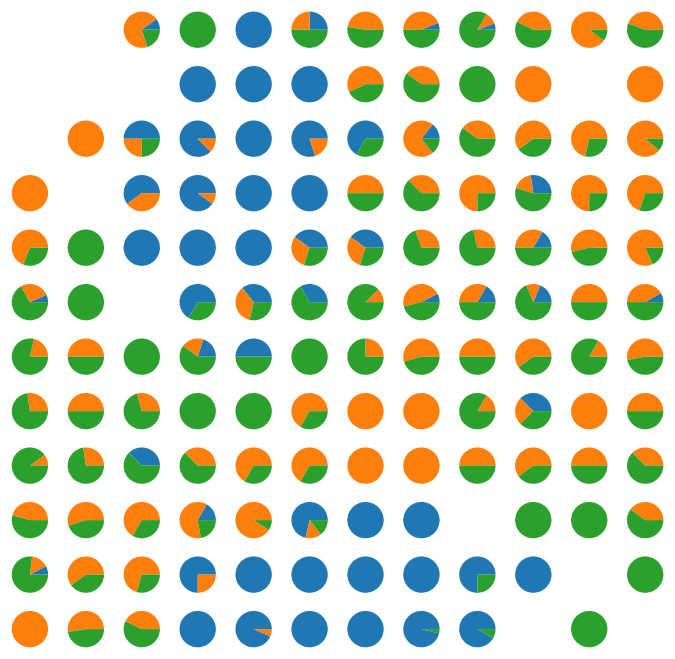

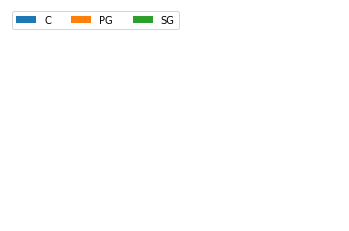

In [16]:
som_pie_grid(som, X_scale, y)

 [ 300 / 300 ] 100% - 0:00:00 left 
 quantization error: 2.7903711405169935


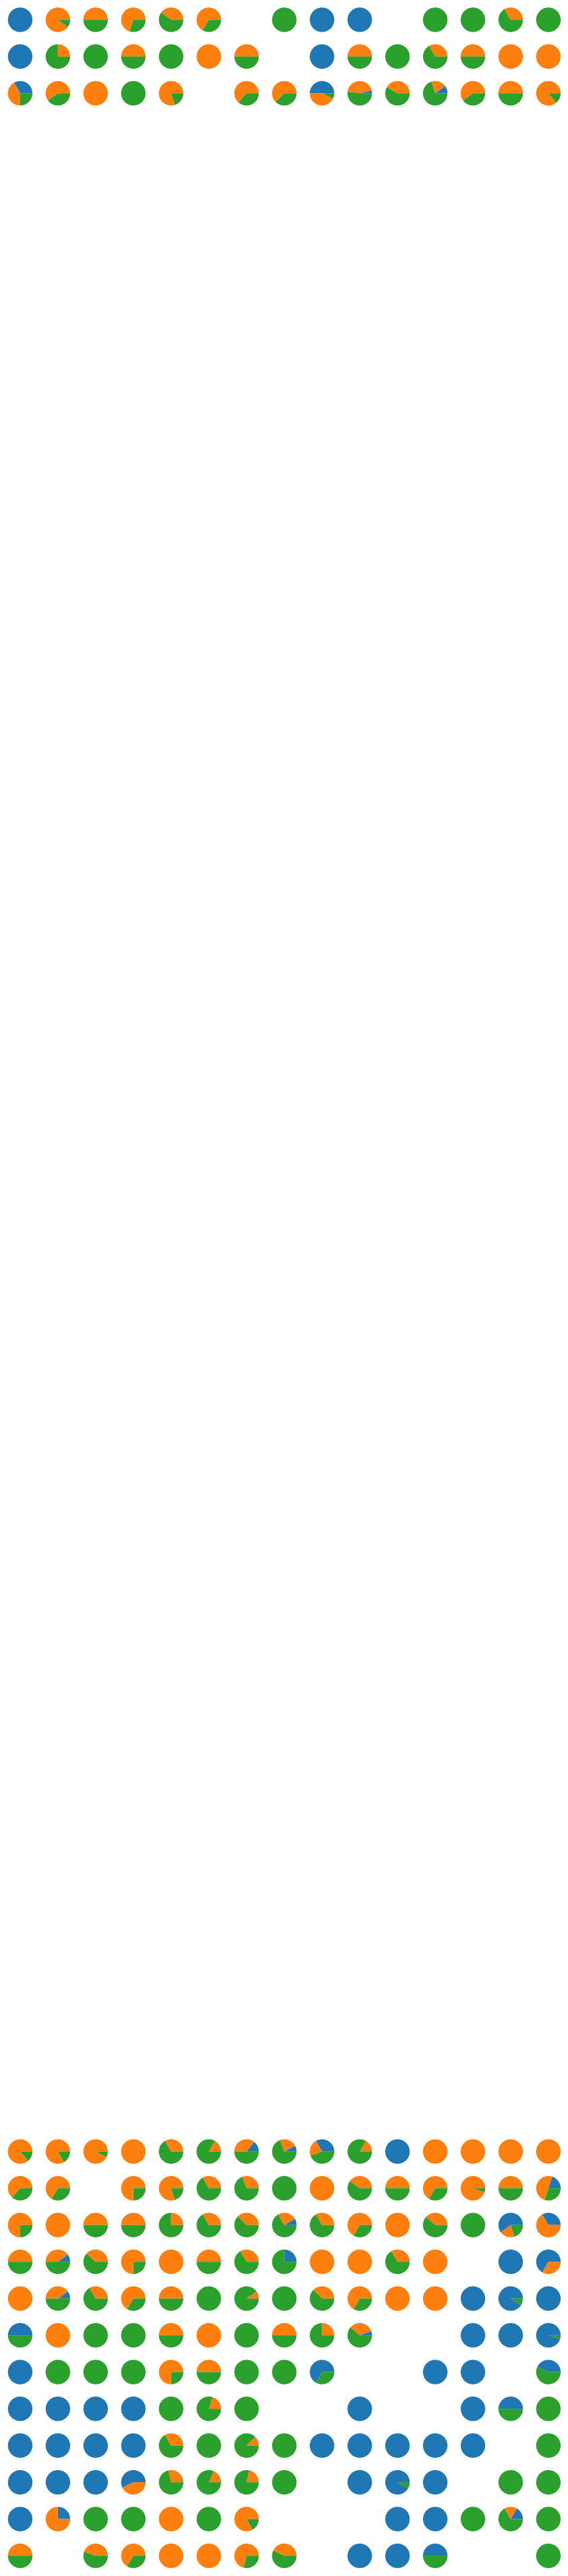

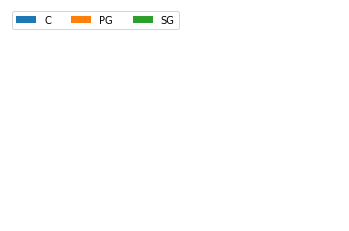

In [17]:
grid_size = 15

som = MiniSom(x=grid_size, y=grid_size, input_len=X_scale.shape[1], random_seed=55)
som.random_weights_init(X_scale)
som.train_random(X_scale, num_iteration=300, verbose=True)
som_pie_grid(som, X_scale, y)

* Perform dimension reduction (to 2d) with another method (perhaps `PCA` or `TSNE`).
* Create a scatter plot of the results of this dimension reduction and color the scatter plot by the players' positions (the `'Pos'` column).
  * How do these results compare to that of the SOM? What are the pros and cons of the different approaches you took in this notebook?

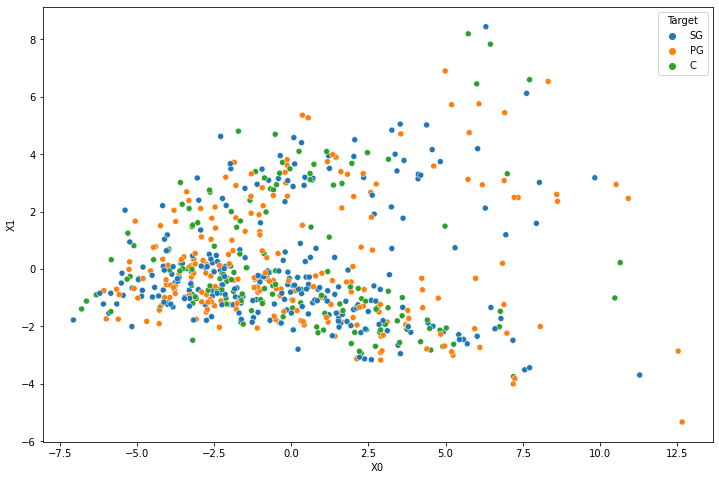

In [18]:

pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scale), columns=["X0", "X1"])
X_pca["Target"] = y
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_pca, x="X0", y="X1", hue="Target")

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 1154 samples in 0.009s...
[t-SNE] Computed neighbors for 1154 samples in 0.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1154
[t-SNE] Computed conditional probabilities for sample 1154 / 1154
[t-SNE] Mean sigma: 1.162259
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.857628
[t-SNE] KL divergence after 1000 iterations: 1.244576


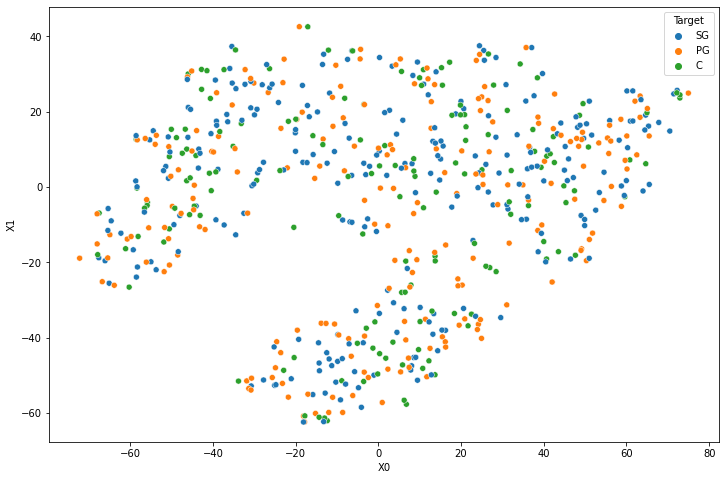

In [19]:
tsne = TSNE(n_components=2, verbose=1, perplexity=16)
X_tsne = pd.DataFrame(tsne.fit_transform(X_scale), columns=["X0", "X1"])
X_tsne["Target"] = y
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_tsne, x="X0", y="X1", hue="Target")

In [ ]:
#SOM seperates the data better 